In [64]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier



# 문제1. 서포트 벡터 머신 사용
### 유방암.csv 파일 열기
### 목표변수는 명목형 변수이다.
### 나머지 독립변수들은 연속형 데이터로 되어 있는것을 확인

In [23]:
df = pd.read_csv(os.getcwd()+"/유방암.csv",engine='python',encoding='euc-kr')
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 결측치 확인
### 결측치는 없는 것을 알 수 있다.

In [24]:
df.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## 종속변수와 독립변수 나누기

In [25]:
df_y = df["diagnosis"]
df_x = df.drop("diagnosis", axis=1,inplace = False)

In [26]:
v_feature_name = df_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## train, varidation, test 의 표본 0.4, 0.3, 0.3 으로 나누기

In [32]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_scaled,df_y,test_size = 0.3 ,random_state = 1234)
df_train_x, df_validation_x, df_train_y,df_validation_y = train_test_split(df_train_x,df_train_y,test_size = 0.428 ,random_state = 1234)

## 기본 Support vector machine  실행후 설명력 확인

In [33]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x,df_train_y)

print(svm_uncustomized.score(df_train_x,df_train_y))
print(svm_uncustomized.score(df_validation_x,df_validation_y))
df_train_x

0.9955947136563876
0.9649122807017544


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
540,-0.734828,-1.128546,-0.713374,-0.716683,0.247636,0.145150,-0.269044,-0.592724,0.023298,0.711976,...,-0.830233,-0.976611,-0.848337,-0.743216,0.093432,-0.270137,-0.443716,-0.691687,-0.924975,-0.144403
24,0.716485,0.486439,0.742699,0.710203,1.120124,0.783815,0.799760,1.103489,0.669515,0.071219,...,2.110339,0.957974,2.077228,2.345788,2.109883,0.658627,0.946607,1.444909,1.152255,0.648043
84,-0.604181,-0.846971,-0.618637,-0.601781,0.061894,-0.619543,-0.593716,-0.781278,0.976194,-0.441954,...,-0.538247,-0.126566,-0.580264,-0.549670,0.233707,-0.343293,-0.218232,-0.582969,0.773694,-0.260777
79,-0.359929,-0.300110,-0.361610,-0.422603,0.212053,-0.168308,-0.626610,-0.664689,-0.341796,-0.400843,...,-0.420210,-0.139593,-0.458142,-0.454391,-0.152049,-0.255506,-0.475379,-0.538203,-0.196974,-0.264102
546,-1.081325,-0.684076,-1.098091,-0.938523,-0.143774,-1.030979,-0.987817,-1.120082,0.267911,-0.111652,...,-1.039387,-0.636267,-1.076496,-0.871368,-0.169583,-1.055006,-1.095507,-1.382518,-0.355517,-0.551710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,-0.825712,3.378983,-0.872369,-0.762473,-1.320851,-1.300090,-1.052512,-1.095861,0.121873,-0.640418,...,-0.809525,2.622237,-0.858464,-0.720187,-1.421536,-1.179499,-1.194624,-1.287960,0.016573,-0.602692
173,-0.865474,-1.065715,-0.896259,-0.802575,0.301721,-0.889033,-0.818199,-0.595561,-0.896740,0.551787,...,-1.018678,-1.442344,-1.049987,-0.850976,-0.472051,-1.093302,-1.116904,-1.089406,-1.615768,-0.599367
526,-0.189520,-0.125580,-0.186552,-0.295187,0.792763,0.179262,-0.587439,-0.448793,-0.323542,0.052790,...,-0.190348,-0.084227,-0.159688,-0.282643,1.316453,0.369820,-0.032568,0.427773,0.998566,0.149854
401,-0.624062,-1.950000,-0.652001,-0.603488,-0.543724,-0.983979,-0.787690,-0.798560,-0.768957,-1.047271,...,-0.511326,-0.901702,-0.584434,-0.511699,0.220556,-0.615561,-0.579486,-0.698082,-0.713046,-0.627629


## Cost값 선정 , 높을 수록 과대 적합 우려
### C가 1이상이면 train 데이터 이용한 모델의 정확도는 과대적합이 우려된다
### 그러므로 0.1 선택

In [105]:
train_accuracy = []; validation_accuracy = []
para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["C"] = para_c
df_score_leaf['TrainAccuracy'] = train_accuracy
df_score_leaf['validation_accuracy'] = validation_accuracy
df_score_leaf.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,validation_accuracy
0,0.01,0.630,0.637
1,0.10,0.974,0.947
2,1.00,0.996,0.965
3,10.00,0.996,0.959


## 그래프로 확인

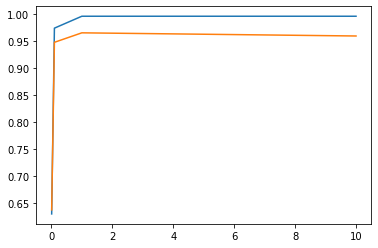

In [41]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_c, validation_accuracy, linestyle = '-', label = "validation Score")

## Gamma선택
### Gamma 의 수치가 커지면 과대적합이 우려된다 하지만 Gamma 0.01일때 정확도가 높기때문에 0.01 선택

In [43]:
train_accuracy = []; validation_accuracy = []
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(C=0.1,gamma=v_gamma,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split["gamma"] = para_gamma
df_score_split['TrainScore'] = train_accuracy
df_score_split['validationScore'] = validation_accuracy
df_score_split.round(3)

,gamma,TrainScore,validationScore
0,0.01,0.965,0.936
1,0.10,0.890,0.889
2,1.00,0.630,0.637
3,10.00,0.630,0.637


### 그래프로 확인

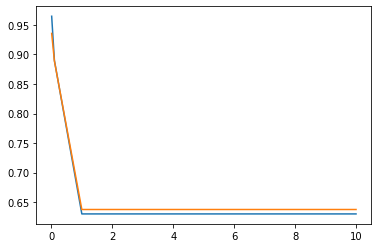

In [45]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_gamma, validation_accuracy, linestyle = '-', label = "validation Score")

# 최종 모델 선택 및 test data set 성능 확인
## 분류표 확인

In [104]:
svc_final = SVC(gamma=0.01, C=0.1,random_state=1234)
svc_final.fit(df_train_x,df_train_y)
y_pred = svc_final.predict(df_test_x)
print(svc_final.score(df_train_x,df_train_y))
print(svc_final.score(df_test_x,df_test_y))
print(pd.DataFrame(confusion_matrix(df_test_y,y_pred)))

0.9647577092511013
0.9005847953216374
     0   1
0  104   1
1   16  50


# 결론.
## test셋의 설명력이 0.90으로 매우 높고 잘 예측한다고 할 수 있지만. 환자가 암이지만 암이 아니라고 예측한 경우가 1번이다. 이경우는 1명에게 매우 심각한 오류로 나타나고, 있어서는 안될 오류가 된다. 이 모델이 설명력이 높지만 1명에게 있어서는 심각한 오분류가 있기 때문에 완벽한 분류를 위해서는 사용자가 채택을 고려 해 볼 필요가 있다. 그렇기 때문에 다른 모델링도 함께 진행해 보도록 한다.

# 문제2. KNN시작
## 기본 KNN 으로 test, validation data set 설명력 확인

In [65]:
knn=KNeighborsClassifier()
knn.fit(df_train_x,df_train_y)
print(knn.score(df_train_x,df_train_y))
print(knn.score(df_validation_x,df_validation_y))

0.9779735682819384
0.9532163742690059


## 이웃이 1개 일때 Train data의 정확도는 1
## 이웃이 2개가 되면서 test 데이터의 정확도가 증가
## 10개에서 격차가 적기때문에 10 선택

In [72]:
train_accuracy=[]; validation_accuracy=[]
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    validation_accuracy.append(knn.score(df_validation_x,df_validation_y))
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['Train Accuracy'] = train_accuracy
df_accuracy_neighbors['validation_accuracy'] = validation_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,Train Accuracy,validation_accuracy
0,1,1.000,0.971
1,2,0.969,0.953
2,3,0.974,0.953
3,4,0.974,0.947
4,5,0.978,0.953
5,6,0.960,0.953
6,7,0.974,0.953
7,8,0.969,0.959
8,9,0.974,0.959
9,10,0.969,0.965


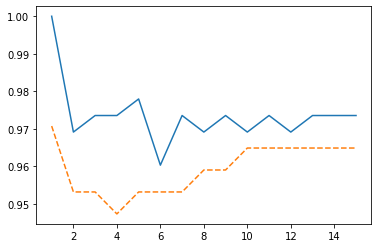

In [73]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_n_neighbors, validation_accuracy, linestyle = '--', label = "test_score")

## 가중치 distance 일때 tarin데이터의 모델 정확도는 1이기대문에 과대적합 되고 있다. 그러므로 uniform 선택

In [80]:
train_accuracy=[];validation_accuracy=[]
para_n_neighbors = [i for i in range(1,11)]*2
para_weights=(['uniform'])*10+(['distance']*10)

for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    validation_accuracy.append(knn.score(df_validation_x,df_validation_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['Weights'] = para_weights
df_accuracy_neighbors['Train_Accuracy'] = train_accuracy
df_accuracy_neighbors['validation_accuracy'] = validation_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,Weights,Train_Accuracy,validation_accuracy
0,1,uniform,1.000,0.971
1,2,uniform,0.969,0.953
2,3,uniform,0.974,0.953
3,4,uniform,0.974,0.947
4,5,uniform,0.978,0.953
5,6,uniform,0.960,0.953
6,7,uniform,0.974,0.953
7,8,uniform,0.969,0.959
8,9,uniform,0.974,0.959
9,10,uniform,0.969,0.965


# 피벗 테이블로 바꾸기

In [90]:
df_accuracy_weights_pivot = df_accuracy_neighbors.pivot(index='Neighbors',columns='Weights',values=['Train_Accuracy','validation_accuracy'])
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns=level0+'_'+level1
df_accuracy_weights_pivot.head()

,Train_Accuracy_distance,Train_Accuracy_uniform,validation_accuracy_distance,validation_accuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.970760,0.970760
2,1.0,0.969163,0.970760,0.953216
3,1.0,0.973568,0.953216,0.953216
4,1.0,0.973568,0.959064,0.947368
5,1.0,0.977974,0.953216,0.953216


# 그래프로 확인
### 가중치 distance일때 train 데이터의 모델 정확도는 1인 것(과대 적합)을 확인 할 수 있다.

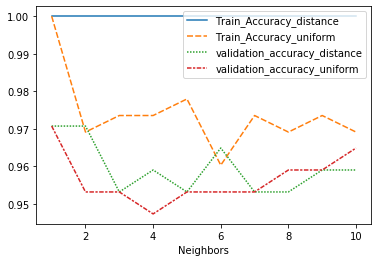

In [91]:
import seaborn as sns
sns.lineplot(data=df_accuracy_weights_pivot)

# 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화
## 우리는 이웃수 10일때를 선택할 것이기 때문에 
## 10일때의 정확도를 확인하면 minkowski와 euclidean가 같기때문에
## 둘중에 하나를 사용한다.

In [97]:
train_accuracy=[];validation_accuracy=[]
para_n_neighbors = [i for i in range(1,11)]*3
para_metric = ["minkowski"]*10 +["euclidean"]*10+['manhattan']*10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors,para_metric):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors,metric=v_metric,weights='uniform')
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    validation_accuracy.append(knn.score(df_validation_x,df_validation_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['Metic'] = para_metric
df_accuracy_neighbors['Train_Accuracy'] = train_accuracy
df_accuracy_neighbors['validation_accuracy'] = validation_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,Metic,Train_Accuracy,validation_accuracy
0,1,minkowski,1.000,0.971
1,2,minkowski,0.969,0.953
2,3,minkowski,0.974,0.953
3,4,minkowski,0.974,0.947
4,5,minkowski,0.978,0.953
5,6,minkowski,0.960,0.953
6,7,minkowski,0.974,0.953
7,8,minkowski,0.969,0.959
8,9,minkowski,0.974,0.959
9,10,minkowski,0.969,0.965


### 피벗테이블 생성

In [100]:
df_accuracy_metic_pivot = df_accuracy_neighbors.pivot(index='Neighbors',columns='Metic',values=['Train_Accuracy','validation_accuracy'])
level0 = df_accuracy_metic_pivot.columns.get_level_values(0)
level1 = df_accuracy_metic_pivot.columns.get_level_values(1)
df_accuracy_metic_pivot.columns=level0+'_'+level1
df_accuracy_metic_pivot.head()

,Train_Accuracy_euclidean,Train_Accuracy_manhattan,Train_Accuracy_minkowski,validation_accuracy_euclidean,validation_accuracy_manhattan,validation_accuracy_minkowski
Neighbors,,,,,,
1,1.000000,1.000000,1.000000,0.970760,0.941520,0.970760
2,0.969163,0.982379,0.969163,0.953216,0.947368,0.953216
3,0.973568,0.982379,0.973568,0.953216,0.959064,0.953216
4,0.973568,0.973568,0.973568,0.947368,0.947368,0.947368
5,0.977974,0.982379,0.977974,0.953216,0.953216,0.953216


### 그래프로 확인

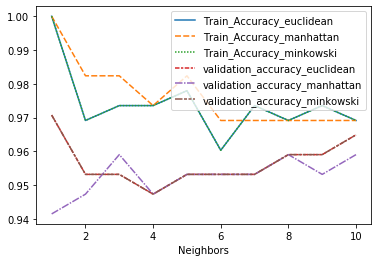

In [101]:
sns.lineplot(data=df_accuracy_metic_pivot)

In [102]:
knn_model = KNeighborsClassifier(n_neighbors=10,weights='uniform',metric='euclidean')
knn_model.fit(df_train_x,df_train_y)

y_pred = knn_model.predict(df_test_x)

print(knn_model.score(df_test_x,df_test_y))
print(confusion_matrix(df_test_y,y_pred))

0.9122807017543859
[[105   0]
 [ 15  51]]


# 결론.
## test셋의 설명력이 0.91으로 높고 잘 예측한다고 할 수 있다.그리고 환자가 암이지만 암이 아니라고 예측한 경우가 0번이다. 물론 다른 데이터셋이 들어온다면 값이 달라 질수 있겠지만, 앞서 했던 support vector machine 보다 모형이 좋다고 할 수 있고 다른 설명력이 좋은 모델이 잇는지 확인하고 없다면 KNN모델은 선택 하도록 한다.

# 문제3. 인공 신경망 시작
### 기본 인공 신경망으로 test, validation data set을 설명력 확인

In [50]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x,df_train_y)
print(nn_uncustomized.score(df_train_x,df_train_y))
print(nn_uncustomized.score(df_validation_x,df_validation_y))

0.9955947136563876
0.9590643274853801


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 은닉층의 구조가 복잡해 질수록 모델 정확도는 낮아짐
## 그러므로 은닉층은 20으로 선택

In [51]:
train_accuracy = []; validation_accuracy=[]
para_hidden = [20*hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=v_hidden ,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_validation_x,df_validation_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['hidden']=para_hidden
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['validation_accuracy'] = validation_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

,hidden,TrainAccuracy,TestAccuracy
0,20,0.996,0.982
1,40,0.996,0.971
2,60,0.996,0.971
3,80,0.996,0.971
4,100,0.996,0.959
5,120,0.996,0.965
6,140,0.996,0.965
7,160,1.000,0.953


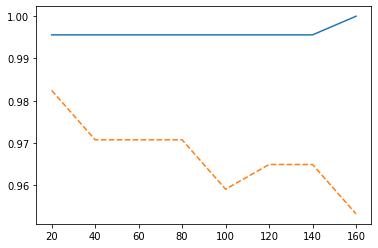

In [53]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_hidden, validation_accuracy, linestyle = '--', label = "test_score")

# 'relu'함수의 모델이 가장 높은 정확도를보임

In [54]:
train_accuracy = []; validation_accuracy=[]
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(hidden_layer_sizes=20,activation=v_function ,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_validation_x,df_validation_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['gamma']=para_function
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['validation_accuracy'] = validation_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,gamma,TrainAccuracy,TestAccuracy
0,logistic,0.996,0.977
1,tanh,0.996,0.971
2,relu,0.996,0.982


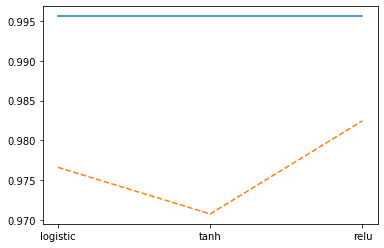

In [55]:
plt.plot(para_function, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_function, validation_accuracy, linestyle = '--', label = "test_score")

# 'adam' 최적화 모델이 가장 격차가 좁은 정확도를 보임

In [57]:
train_accuracy = []; validation_accuracy=[]
para_solve = ['lbfgs', 'sgd', 'adam']

for v_solve in para_solve:
    nn = MLPClassifier(hidden_layer_sizes=20,activation='relu',solver=v_solve ,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_validation_x,df_validation_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['function']=para_solve
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['validation_accuracy'] = validation_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,function,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.971
1,sgd,0.969,0.942
2,adam,0.996,0.982


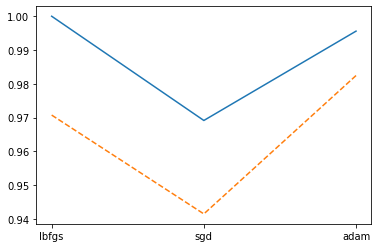

In [58]:
plt.plot(para_solve, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_solve, validation_accuracy, linestyle = '--', label = "test_score")

## batch size가 180일때 가장 높은 validation 정확도를 보여준다
## 180선택

In [61]:
train_accuracy = []; validation_accuracy=[]
para_batch = [20*batch for batch in range(1,12)]

for v_batch in para_batch:
    nn = MLPClassifier(solver='adam',hidden_layer_sizes=20,activation='relu',batch_size=v_batch ,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_validation_x,df_validation_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['batch']=para_batch
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['validation_accuracy'] = validation_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

,batch,TrainAccuracy,TestAccuracy
0,20,1.000,0.965
1,40,0.996,0.977
2,60,0.996,0.977
3,80,0.996,0.977
4,100,0.996,0.977
5,120,0.996,0.977
6,140,0.996,0.977
7,160,0.996,0.977
8,180,0.996,0.982
9,200,0.996,0.982


In [113]:
nn_final = MLPClassifier(hidden_layer_sizes=20, activation='relu', solver='adam',
                        batch_size=180,random_state=1234)
nn_final.fit(df_train_x,df_train_y)
y_pred = nn_final.predict(df_test_x)

print(nn_final.score(df_test_x,df_test_y))
print(confusion_matrix(df_test_y,y_pred))

0.9532163742690059
[[104   1]
 [  7  59]]


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# 결론 
### 인공신경망 트리의 경우 설명력이 0.9532로 KNN모형보다 설명력에서 좋다고 할 수있다. 하지만 암이지만 암이아니라고 판단한 경우가 1회 있기 때문에 설명력이 좋다고 할지라도 KNN모형을 사용하는 것이 좋다고 판단 된다. 교차 검증을 통해 KNN과 인공신경망중 KNN이 더욱 신뢰도를 얻게 된다면 최종적으로 KNN 모형을 선택한다.